In [1]:
# %pip install folium
# %pip install ipyleaflet
# %pip install pyproj
# %pip install requests tqdm
# %pip install numpy
# %pip install pillow
# %pip install -U matplotlib

In [2]:
# Internal modules
import pprint
import math
from process_rectangle import rectangle_to_aerial
# from create_tiles import create_tiles

# External modules
from ipyleaflet import Map, GeomanDrawControl
from pyproj import Transformer
from PIL import Image
import matplotlib.pyplot as plt
import os

In [3]:
# Define some setup values for the map
center = (52.104635, 5.045751) # Around Utrecht
zoom = 14 # Default zoom level
scroll_wheel_zoom = True # Allow zooming in with mouse

# Create map
m = Map(center=center, zoom=zoom, scroll_wheel_zoom=scroll_wheel_zoom)

# Create draw control to allow user to create rectangles.
draw_control = GeomanDrawControl()
draw_control.polyline =  {} # Empty dict disables drawing the chosen thing.
draw_control.polygon = {}
draw_control.circlemarker = {}
draw_control.rectangle = {
    "pathOptions": {
        "fillColor": "#fca45d",
        "color": "#000000",
        "fillOpacity": 0
    }
}

# Disable some unneeded map controls
draw_control.edit = False
draw_control.drag = False
draw_control.cut = False
draw_control.remove = False
draw_control.rotate = False

# Define an event handler for when a rectangle is drawn
def handle_draw(event, action, geo_json):
    coordinates = geo_json[0]["geometry"]["coordinates"][0]
    coordinates.pop(-1) # Remove the last coordinate, which is a duplicate of the first one.
    global rectangle
    rectangle = coordinates

# Define rectangle to get drawn rectangle's coordinates
rectangle = None

# Attach the event handler to the draw control
draw_control.on_draw(handle_draw)
m.add(draw_control)

Map(center=[52.104635, 5.045751], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

<b><ins>Draw a rectangle before continuing</ins></b>

downloading tile 1/36
downloading tile 2/36
downloading tile 3/36
downloading tile 4/36
downloading tile 5/36
downloading tile 6/36
downloading tile 9/36
downloading tile 10/36
downloading tile 11/36
downloading tile 12/36
downloading tile 13/36
downloading tile 14/36
downloading tile 17/36
downloading tile 18/36
downloading tile 19/36
downloading tile 20/36
downloading tile 21/36
downloading tile 22/36
downloading tile 25/36
downloading tile 26/36
downloading tile 27/36
downloading tile 28/36
downloading tile 29/36
downloading tile 30/36
downloading tile 33/36
downloading tile 34/36
downloading tile 35/36
downloading tile 36/36
downloading tile 37/36
downloading tile 38/36
downloading tile 41/36
downloading tile 42/36
downloading tile 43/36
downloading tile 44/36
downloading tile 45/36
downloading tile 46/36


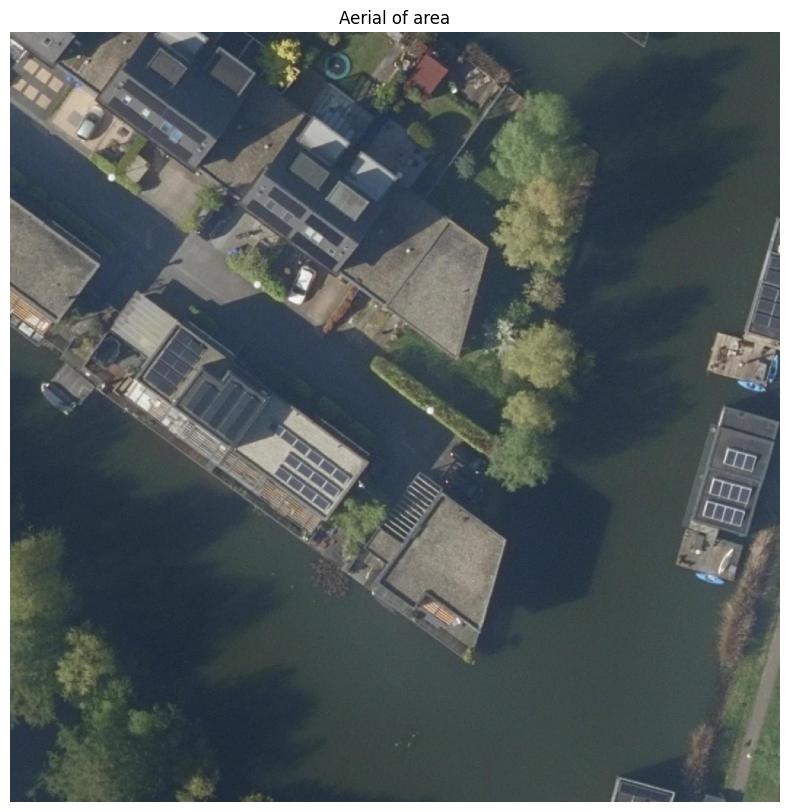

In [5]:
# Create an earial picture of the drawn polygon
tif_path, aerial = rectangle_to_aerial(rectangle)

# Display the aerial  
plt.figure(figsize=(10, 10))
plt.imshow(aerial)
plt.axis("off")
plt.title("Aerial of area")
plt.show()

In [10]:
from PIL import Image
import numpy as np
import os

def create_tiles(aerial_img, tile_size_m, overlap_m, zoom, downloads_f):
    # IN: 
    # aerial_path: Path to .tif of satellite view of the area
    # tile_size_m: User input. Height/width of a tile in meters.
    # overlap_m: User input. Overlap between tiles in meters
    # zoom: User input. Chosen zoom level.
    
    # 1. Gebruiker geeft tilesize in meters -> hoogte en breedte tile
    # 2. Gebruiker geeft tile overlap in meters -> overlap tussen tiles
    # 3. Gebruiker geeft zoomniveau -> Gebruik dit om m/pixel te bereken.
    # 4. Convert alle inputs van meters naar pixels adhv m/pixel.
    # 5. Bereken aantal tiles in width en height. Formule: aantal tiles = (aerial_width / tile_width) + (aerial_width / tile_width) * (overlap / tile_width)

    tiles = []
    idx_coors = {}
    m_per_pixel = (3440.640 / 2**zoom) # From https://www.geonovum.nl/uploads/standards/downloads/nederlandse_richtlijn_tiling_-_versie_1.1.pdf
    tile_size = int(tile_size_m / m_per_pixel)
    overlap = int(overlap_m / m_per_pixel)
    aerial = np.array(aerial_img)
    tiles_f = os.path.join(downloads_f, 'tiles')

    a_w = int(aerial.shape[0])
    a_h = int(aerial.shape[1])

    # Adjust the loop to slice tiles with overlap
    # Ensure loops do not create out-of-bound indices by adjusting the range limits
    for x in range(0, a_w - tile_size + overlap + 1, tile_size - overlap):
        for y in range(0, a_h - tile_size + overlap + 1, tile_size - overlap):
            # Calculate end indices ensuring not to exceed the image dimensions
            end_x = x + tile_size if (x + tile_size <= a_w) else a_w
            end_y = y + tile_size if (y + tile_size <= a_h) else a_h
            tile = aerial[x:end_x, y:end_y]
            tiles.append(tile)
            idx_coors[len(tiles)-1] = [y, x]  # Store the start coordinates of each tile
            
    # Save each tile as an image
    for i, tile in enumerate(tiles):
        im = Image.fromarray(tile)
        im.save(os.path.join(tiles_f,f"tile_{i}.png"))
    return idx_coors

In [11]:
tile_size = 10
overlap = 1
zoom = 16
downloads = os.path.join('.','downloads')
create_tiles(aerial, tile_size, overlap, zoom, downloads)

{0: [0, 0],
 1: [171, 0],
 2: [342, 0],
 3: [513, 0],
 4: [684, 0],
 5: [855, 0],
 6: [1026, 0],
 7: [1197, 0],
 8: [0, 171],
 9: [171, 171],
 10: [342, 171],
 11: [513, 171],
 12: [684, 171],
 13: [855, 171],
 14: [1026, 171],
 15: [1197, 171],
 16: [0, 342],
 17: [171, 342],
 18: [342, 342],
 19: [513, 342],
 20: [684, 342],
 21: [855, 342],
 22: [1026, 342],
 23: [1197, 342],
 24: [0, 513],
 25: [171, 513],
 26: [342, 513],
 27: [513, 513],
 28: [684, 513],
 29: [855, 513],
 30: [1026, 513],
 31: [1197, 513],
 32: [0, 684],
 33: [171, 684],
 34: [342, 684],
 35: [513, 684],
 36: [684, 684],
 37: [855, 684],
 38: [1026, 684],
 39: [1197, 684],
 40: [0, 855],
 41: [171, 855],
 42: [342, 855],
 43: [513, 855],
 44: [684, 855],
 45: [855, 855],
 46: [1026, 855],
 47: [1197, 855],
 48: [0, 1026],
 49: [171, 1026],
 50: [342, 1026],
 51: [513, 1026],
 52: [684, 1026],
 53: [855, 1026],
 54: [1026, 1026],
 55: [1197, 1026],
 56: [0, 1197],
 57: [171, 1197],
 58: [342, 1197],
 59: [513, 119